# Before your start:

    Read the README.md file
    Comment as much as you can and use the resources (README.md file)
    Happy learning!

In this exercise, we  will generate random numbers from the continuous disributions we learned in the lesson. There are two ways to generate random numbers:

1. Using the numpy library 
1. using the Scipy library 

Use either or both of the lbraries in this exercise.

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
import seaborn as sns
from scipy import stats

## Uniform Distribution

To generate uniform random numbers between any two given values using scipy, we can either use the following code or the code that we have
discussed in class:

In [3]:
# your code here
lower_bound = 10
upper_bound = 20
np.random.uniform(lower_bound, upper_bound)

10.318960438846382

In [4]:
stats.uniform.rvs(lower_bound,upper_bound-lower_bound)

np.float64(13.245108544991357)

In [5]:
def rnd_uniform_man(bottom,ceiling,count=1):
    '''A reimplementation of the standard functions of generating an array of uniform data 
    
    bottom: lower boundary of generated numbers
    ceiling: upper boundary
    count: number of elements to create
    
    returns an array (even if 1, the main difference from the standard functions?)
    '''
    return np.array([stats.uniform.rvs(lower_bound,upper_bound-lower_bound) for _ in range(count)])

# this is even more straightforward, but is really just a differently named wrapper for the available functions
def rnd_uniform_simplewrapper(bottom,ceiling,count=1):
    return stats.uniform.rvs(lower_bound,upper_bound-lower_bound,count)
    return np.random.uniform(lower_bound, upper_bound, count)        # the same thing also works with numpy, but I prefer scipy here
    

In [6]:
rnd_uniform_man(10,20,10)

array([17.11700488, 18.05643828, 11.88222448, 15.47586832, 13.3921799 ,
       17.67678077, 13.71621837, 14.66455327, 19.36711987, 14.27747676])

In [7]:
rnd_uniform_simplewrapper(10,20,10)

array([19.39069485, 10.01917616, 13.79000466, 10.04592078, 16.2790717 ,
       18.60908284, 18.69569337, 18.72867505, 14.77226441, 17.71228081])

**Your task:**

1. Based on the code above, write a function that generates uniformly distributed random numbers. There are several requirements for your function:
    * It should accept 3 parameters: 
        * `bottom` - the lower boundary of the generated numbers
        * `ceiling` - the upper boundary of the generated numbers
        * `count` - how many numbers to generate
    * It should return an array of uniformly distributed random numbers

1. Call your function with 2 sets of params below:
    * bottom=10, ceiling=15, count=100
    * bottom=10, ceiling=60, count=1,000

1. Plot the uniform distributions generated above using histograms, where x axis is the value and y axis is the count. Let the histogram's number of bins be 10.

Your output should look like below:

![uniform distribution](ud.png)

In [8]:
# your code here
ar1 = rnd_uniform_man(10,15,100)
ar2 = rnd_uniform_man(10,60,1000)

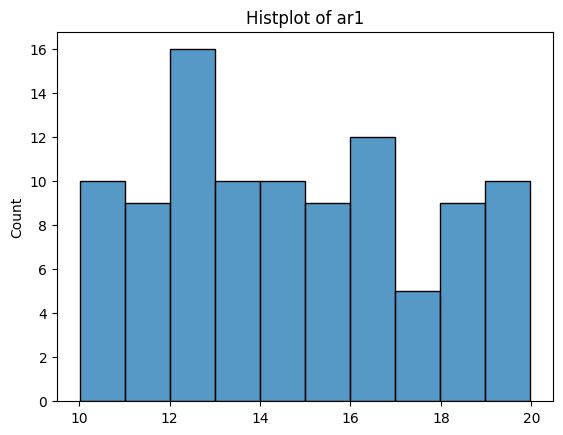

In [9]:
# your code here
sns.histplot(ar1,bins=10)
plt.title('Histplot of ar1');

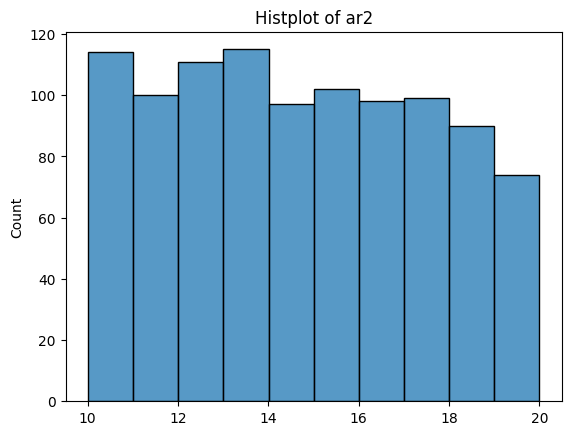

In [10]:
# your code here
sns.histplot(ar2,bins=10)
plt.title('Histplot of ar2');

How are the two distributions different?

In [11]:
# your answer below

The larger array `ar2` (n=1000) more closely approximates a uniform distribution than the smaller `ar1` (n=100), where there are more noticable drops in frequencies for certain numbers.

## Normal Distribution

1. In the same way in the Uniform Distribution challenge, write a function that generates normally distributed random numbers.
1. Generate 1,000 normally distributed numbers with the average of 10 and standard deviation of 1
1. Generate 1,000 normally distributed numbers with the average of 10 and standard deviation of 50
2. Plot the distributions of the data generated.

Expected output:

![normal distribution](nd.png)

In [12]:
from scipy.stats import norm 

In [13]:
# your code here
def rnd_norm_man(av,sd,count):
    return [norm.rvs(av,sd) for _ in range(count)]

def rnd_norm_wrapper(av,sd,count):
    return norm.rvs(av,sd,count)

In [14]:
# your code here
normar1 = rnd_norm_man(10,1,1000)
normar2 = rnd_norm_man(10,50,1000)

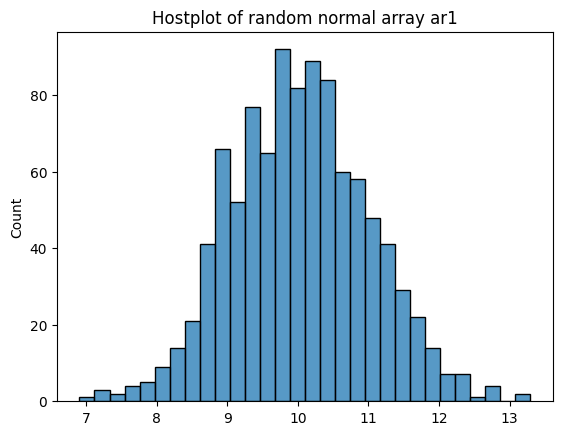

In [15]:
# your code here
sns.histplot(normar1,bins=30)
plt.title('Hostplot of random normal array ar1');

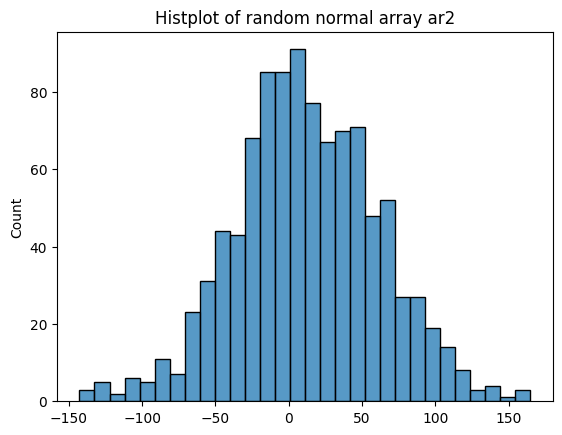

In [16]:
# your code here
sns.histplot(normar2,bins=30)
plt.title('Histplot of random normal array ar2');

How are the two distributions different?

Your answer here

In ar1 the smaller SD leads to a distribution that does not provide negative values, while the much wider SD for ar2 leads to a much wider distribution reaching well into negative numbers. Otherwise, the distribution approximates a normal curve in both cases. 

## Normal Distribution of Real Data

In this challenge we are going to take a look the real data. We will use vehicles.csv file for this exercise

In [17]:
# your code here
veh = pd.read_csv('vehicles.csv')

In [18]:
veh.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


In [26]:
veh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35952 entries, 0 to 35951
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Make                     35952 non-null  object 
 1   Model                    35952 non-null  object 
 2   Year                     35952 non-null  int64  
 3   Engine Displacement      35952 non-null  float64
 4   Cylinders                35952 non-null  float64
 5   Transmission             35952 non-null  object 
 6   Drivetrain               35952 non-null  object 
 7   Vehicle Class            35952 non-null  object 
 8   Fuel Type                35952 non-null  object 
 9   Fuel Barrels/Year        35952 non-null  float64
 10  City MPG                 35952 non-null  int64  
 11  Highway MPG              35952 non-null  int64  
 12  Combined MPG             35952 non-null  int64  
 13  CO2 Emission Grams/Mile  35952 non-null  float64
 14  Fuel Cost/Year        

First import vehicles.csv.
Then plot the histograms for the following variables:

1. Fuel Barrels/Year

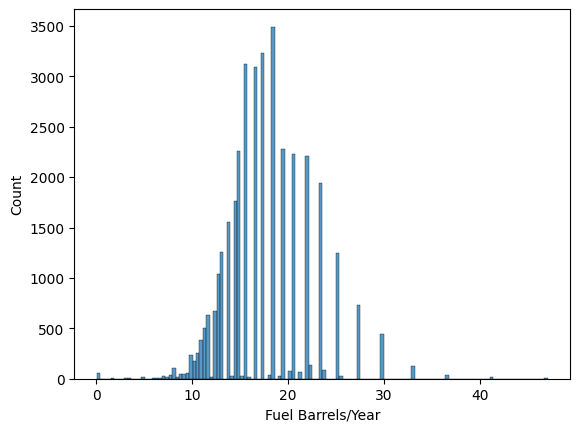

In [22]:
# your code here
sns.histplot(veh['Fuel Barrels/Year']);

2. CO2 Emission Grams/Mile 

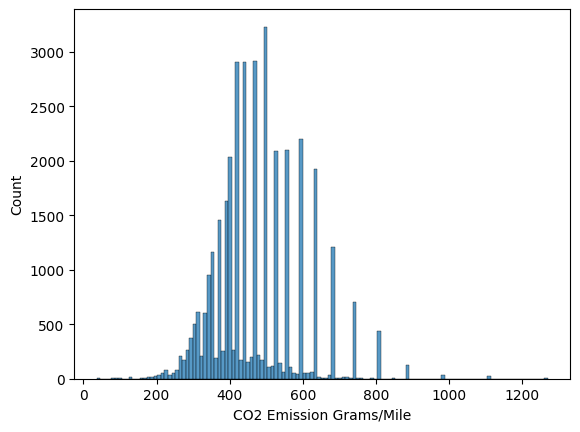

In [23]:
# your code here
sns.histplot(veh['CO2 Emission Grams/Mile']);

3. Combined MPG

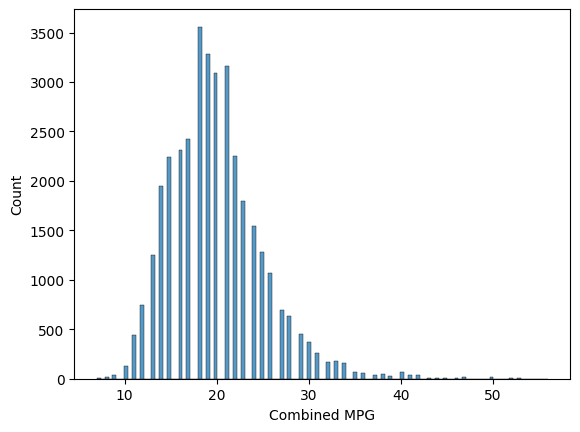

In [24]:
# your code here
sns.histplot(veh['Combined MPG']);

In [ ]:
# your code here

In [ ]:
# your code here

Which one(s) of the variables are nearly normally distributed? How do you know?

In [30]:
# your code here
# test skewness and curtosis, use stats.describe function
testcols=['Fuel Barrels/Year','CO2 Emission Grams/Mile','Combined MPG']

for c in testcols:
    temp=stats.describe(veh[c])
    print(f"{c}\nSkewness: {temp.skewness}, Kurtosis: {temp.kurtosis}\n")

Fuel Barrels/Year
Skewness: 0.6382445784906976, Kurtosis: 1.467913801930207

CO2 Emission Grams/Mile
Skewness: 0.7416608937445333, Kurtosis: 1.2632401888522526

Combined MPG
Skewness: 1.0677281511016457, Kurtosis: 2.722005828121911



A skewness of 0 corresponds to a symmetric distribution, so for all three tested variables the distribution is slightly positively skewed (or right skewed), i.e. they have slight tail to the right. `Fuel Barrels/y` is the one with the skewness value closest to 0, so most closely approximates a normal distribution for this parameter (closely followed by `CO2 Emission Grams/Mile`).
For kurtosis, a value of 3 corresponds to the a mesokurtic curve associated with the normal distribution. All three variables have kurtosis values $<3$, so they should be somewhat less flat than a normal distribution. For this parameter, `Combined MPG` approximates the value of 3. 

None of them are precisely normally distributed. `Combined MPG` most closely approximates the kurtosis of a normal distribution, but has the strongest (positive) skewness, while `Fuel Barrels/Year` has the weakest skewness and thus approximates a normal distribution, but then displays a fairly low kurtosis. 

## Exponential Distribution

1. Using `numpy.random.exponential`, create a function that returns a list of numbers exponentially distributed with the mean of 10. 

1. Use the function to generate two number sequences with the size of 10 and 100.

1. Plot the distributions as histograms with the nubmer of bins as 100.

Your output should look like below:

![exponential distribution](ed.png)

In [31]:
# your code here
def expnums(count):
    return np.random.exponential(10, size=count)

In [36]:
expar1 = expnums(10)
expar2 = expnums(100)

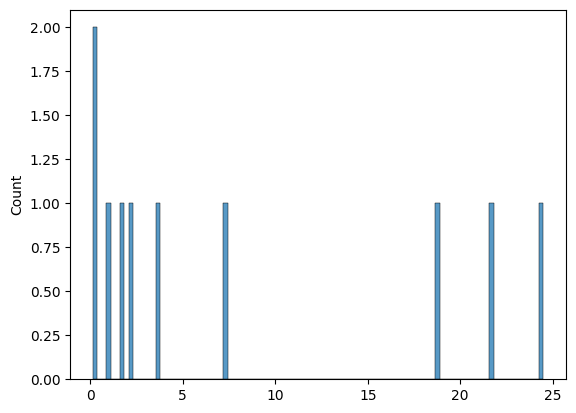

In [37]:
sns.histplot(expar1,bins=100);

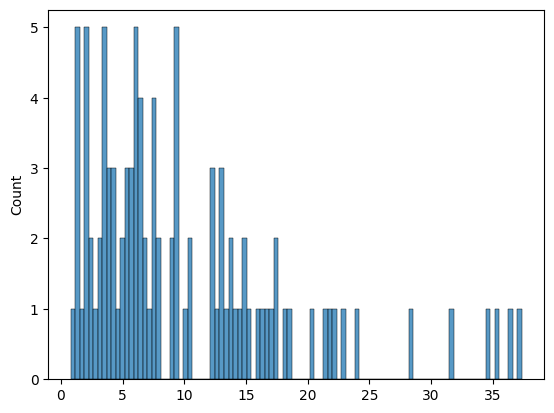

In [39]:
sns.histplot(expar2,bins=100);

How are the two distributions different?

The first one is almost flat, the second one begins to show a rough approximation to an exponential function.

The mean changes, so the distribution changes as well. 

## Exponential Distribution of Real Data

Suppose that the amount of time one spends in a bank is exponentially distributed with mean as 10 minutes (i.e. λ = 1/10). What is the probability that a customer will spend less than fifteen minutes in the bank? 

Write a code in python to solve this problem

In [45]:
# your code here
print(f"The probability that a customer will spend less than 15 minutes is {round(stats.expon.cdf(15,scale=10)*100,3)}%.")

The probability that a customer will spend less than 15 minutes is 77.687%.


In [ ]:
# your answer here
# Hint: This is same as saying P(x<15)

What is the probability that the customer will spend more than 15 minutes

In [ ]:
# your code here
print(f"The probability that a customer will spend more than 15 minutes is {round(stats.expon.sf(15,scale=10)*100,3)}%.")

The probability that a customer will spend less than 15 minutes is 22.313%.
